
* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
* [Part 4: Feature Selection](#Part-4:-Feature-Importance)
* [Part 5: Final Prediction](#Part-5:-Final-Prediction)

# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [461]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')

In [364]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [365]:
print ("Num of rows: " + str(df.shape[0])) # row count
print ("Num of columns: " + str(df.shape[1])) # col count

Num of rows: 891
Num of columns: 12


In [366]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [367]:
# check the unique values for each column
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [368]:
# Get target variable
y = df['Survived']

In [369]:
# check the propotion of y = 1
print(y.sum() / len(y) * 100)

38.38383838383838


### Part 1.2:  Understand the features

In [370]:
# check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [371]:
# understand Numerical feature
# discrete/continuous
df[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [372]:
# check the feature distribution
# pandas.DataFrame.describe()
# boxplot, distplot, countplot
import matplotlib.pyplot as plt
import seaborn as sns

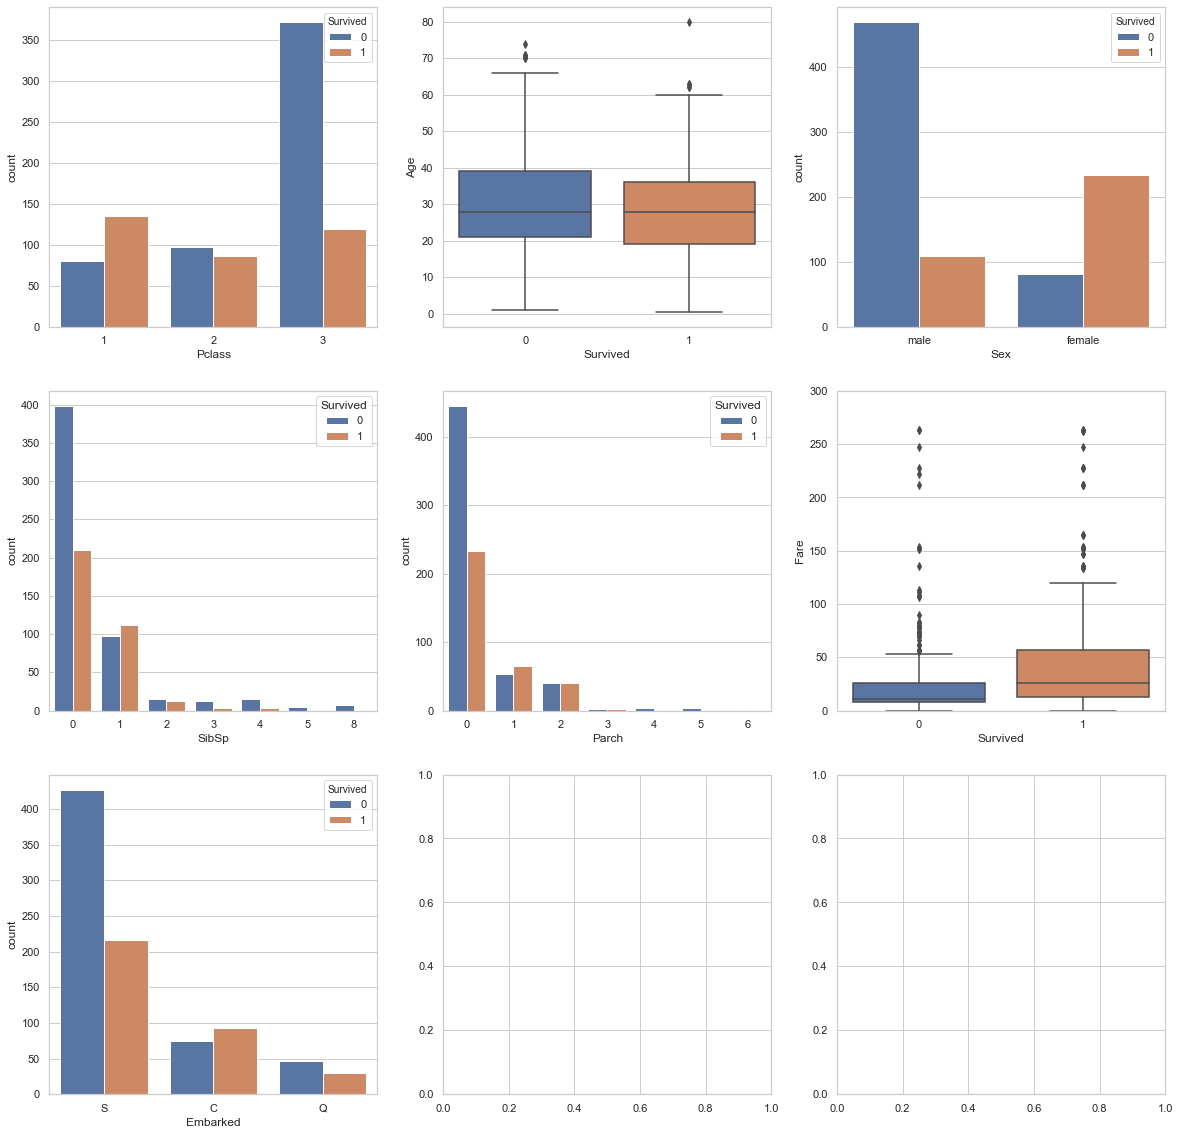

In [373]:
# feature exploration
sns.set(style="whitegrid")
_,axss = plt.subplots(3,3, figsize=[20,20])
plt1 = sns.countplot(x='Pclass', hue='Survived', data=df, ax=axss[0][0])
plt2 = sns.boxplot(x='Survived', y ='Age', data=df, ax=axss[0][1])
plt3 = sns.countplot(x='Sex', hue='Survived', data=df, ax=axss[0][2])
plt4 = sns.countplot(x='SibSp', hue='Survived', data=df, ax=axss[1][0])
plt4.legend(loc = 1, title = 'Survived')
plt5 = sns.countplot(x='Parch', hue='Survived', data=df, ax=axss[1][1])
plt5.legend(loc = 1, title = 'Survived')
plt6 = sns.boxplot(x='Survived', y ='Fare', data=df, ax=axss[1][2])
plt6.set(ylim=(0, 300))
plt7 = sns.countplot(x='Embarked', hue='Survived', data=df, ax=axss[2][0])


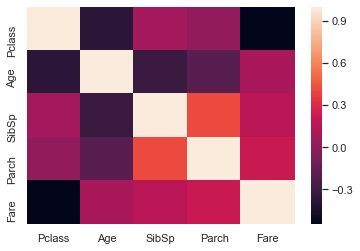

In [374]:
# correlations between features
corr_score = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

# show heapmap of correlations
sns.heatmap(corr_score)

In [375]:
# check the actual values of correlations
corr_score

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


# Part 2: Feature Preprocessing

feature encoding, feature scaling

Read more for handling [categorical feature](https://github.com/scikit-learn-contrib/categorical-encoding), and there is an awesome package for [encoding](https://contrib.scikit-learn.org/categorical-encoding/#category-encoders).

In [523]:
# for refreshing original dataframe
df = pd.read_csv('train.csv')

In [525]:
# extract useful information from columns
# separate Cabin code and number
df['Ccode'] = df['Cabin'].str[0]

for i in range(len(df)):
    if len(str(df['Cabin'][i])) >=5:
        df['Cnumber'] = 'multiple'
    else:
        df['Cnumber'] = df['Cabin'].str[1:]

In [527]:
# separate Ticket code and number
Tcode = []
Tnumber = []
temp = []

for i in range(len(df)):
    temp.append(df['Ticket'][i].split())
    
for i in range(len(temp)):
    if len(temp[i]) == 1:
        temp[i] = [np.nan] + temp[i]
        
for i in range(len(temp)):
    Tcode.append(temp[i][0])
    Tnumber.append(temp[i][1])
    
# remove period in Ticket code
for i in range(len(Tcode)):
    if str(Tcode[i])[-1] == '.':
        Tcode[i] = Tcode[i][0:len(Tcode[i])-1]
    
df['Tcode'] = Tcode
df['Tnumber'] = Tnumber

In [528]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ccode,Cnumber,Tcode,Tnumber
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,A/5,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85,PC,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,STON/O2,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123,NaN,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,NaN,373450
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,NaN,NaN,330877
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E,46,NaN,17463
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,NaN,NaN,349909
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,NaN,NaN,347742
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,NaN,NaN,237736


In [529]:
# ordinal encoding
df['Sex'] = (df['Sex'] == 'male')
df['Sex'] = df['Sex'].astype(int)

In [530]:
# data imputation (age, cabin, embarked)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df["Age"].fillna(df["Age"].median(), inplace = True) 

df["Ccode"].fillna("No Record", inplace = True)
df["Cnumber"].fillna("No Record", inplace = True)
df['Ccode'] = labelencoder.fit_transform(df['Ccode'])
df['Cnumber'] = labelencoder.fit_transform(df['Cnumber'])

df["Tcode"].fillna("No Record", inplace = True)
df["Tnumber"].fillna("No Record", inplace = True)
df['Tcode'] = labelencoder.fit_transform(df['Tcode'])
df['Tnumber'] = labelencoder.fit_transform(df['Tnumber'])

df["Embarked"].fillna(df["Embarked"].mode(), inplace = True) 

In [531]:
# one hot encoding
df = pd.get_dummies(df, columns=['Pclass', 'Embarked'], drop_first=True)

In [532]:
# delete columns that are less contributing
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [534]:
df.head(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Ccode,Cnumber,Tcode,Tnumber,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,7,101,3,162,0,1,0,1
1,1,0,38.0,1,0,71.2833,2,89,15,126,0,0,0,0
2,1,0,26.0,0,0,7.9250,7,101,34,343,0,1,0,1
3,1,0,35.0,1,0,53.1000,2,17,13,51,0,0,0,1
4,0,1,35.0,0,0,8.0500,7,101,13,595,0,1,0,1
5,0,1,28.0,0,0,8.4583,7,101,13,384,0,1,1,0
6,0,1,54.0,0,0,51.8625,4,57,13,102,0,0,0,1
7,0,1,2.0,3,1,21.0750,7,101,13,515,0,1,0,1
8,1,0,27.0,0,2,11.1333,7,101,13,464,0,1,0,1
9,1,0,14.0,1,0,30.0708,7,101,13,210,1,0,0,0


# Part 3: Model Training and Result Evaluation

### Part 3.1: Split dataset

In [535]:
# Splite data into training and testing
# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.iloc[:,1:14], y, test_size=0.2, stratify = y)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 712 observation with 13 features
test data has 179 observation with 13 features


In [56]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min) ->[0,1]

# 1. speed up gradient descent
# 2. same scale
# 3. algorithm requirments

# for example, use training data to train the standardscaler to get mean and std 
# apply mean and std to both training and testing data.
# fit_transform does the training and applying, transform only does applying.
# Because we can't use any info from test, and we need to do the same modification
# to testing data as well as training data

# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# https://scikit-learn.org/stable/modules/preprocessing.html


# min-max example: (x-x_min)/(x_max-x_min)
# [1,2,3,4,5,6] -> fit(min:1, max:6) (scalar.min = 1, scalar.max = 6) -> transform [(1-1)/(6-1),(2-1)/(6-1)..]
# scalar.fit(train) -> min:1, max:100
# scalar.transform(apply to x) -> apply min:1, max:100 to X_train
# scalar.transform -> apply min:1, max:100 to X_test

# scalar.fit -> mean:1, std:100
# scalar.transform -> apply mean:1, std:100 to X_train
# scalar.transform -> apply mean:1, std:100 to X_test

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

### Part 3.2: Model Training and Selection

In [536]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [537]:
# Train the model
classifier_logistic.fit(X_train, y_train)

C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [538]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1], dtype=int64)

In [539]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.8435754189944135

In [540]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.74825175 0.79020979 0.77622378 0.78873239 0.77304965]
Model accuracy of Logistic Regression is 0.7752934708883166
[0.72727273 0.69230769 0.68531469 0.71830986 0.69503546]
Model accuracy of KNN is 0.7036480850085884
[0.76223776 0.83916084 0.78321678 0.83802817 0.81560284]
Model accuracy of Random Forest is 0.8076492781017803


C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [541]:
from sklearn.svm import SVC 

classifier_SVC = SVC()

cv_score = model_selection.cross_val_score(classifier_SVC, X_train, y_train, cv=5)
print('Model accuracy of SVM is: ' + str(cv_score.mean()))


Model accuracy of SVM is: 0.6377062853239059


C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\svm\

### Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [542]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression

In [546]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2

# ('l1', 1) ('l1', 5) ('l1', 10) ('l2', 1) ('l2', 5) ('l2', 10)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 0.1, 1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (0.01, 0.1, 1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [547]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.7837078651685393
Best parameters set:
C:5
penalty:l1


In [548]:
# best model
best_LR_model = Grid_LR.best_estimator_

#### Part 3.3.2: Find Optimal Hyperparameters: KNN

In [549]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[4,5,6,7,8,9] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [550]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.7036516853932584
Best parameters set:
n_neighbors:5


In [551]:
best_KNN_model = Grid_KNN.best_estimator_

#### Part 3.3.3: Find Optimal Hyperparameters: Random Forest

In [554]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [50,60,70,80,90,100]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [555]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8356741573033708
Best parameters set:
n_estimators:80


In [556]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

####Part 3.4: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users. 


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.

In [557]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Survived']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.8435754189944135
precision is: 0.8360655737704918
recall is: 0.7391304347826086


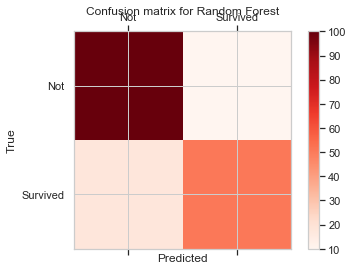

Logistic Regression
Accuracy is: 0.8435754189944135
precision is: 0.8059701492537313
recall is: 0.782608695652174


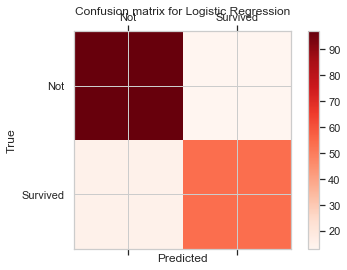

K nearest neighbor
Accuracy is: 0.6536312849162011
precision is: 0.5686274509803921
recall is: 0.42028985507246375


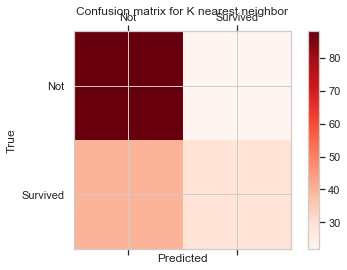

In [558]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

In [559]:
confusion_matrix(y_test,best_RF_model.predict(X_test))

array([[100,  10],
       [ 18,  51]], dtype=int64)

### Part 3.4: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

#### Part 3.4.1: ROC of RF Model

In [560]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [561]:
best_RF_model.predict_proba(X_test)

array([[0.775     , 0.225     ],
       [0.925     , 0.075     ],
       [0.95      , 0.05      ],
       [1.        , 0.        ],
       [0.6875    , 0.3125    ],
       [0.125     , 0.875     ],
       [1.        , 0.        ],
       [0.025     , 0.975     ],
       [0.125     , 0.875     ],
       [0.9875    , 0.0125    ],
       [0.6625    , 0.3375    ],
       [0.775     , 0.225     ],
       [0.0875    , 0.9125    ],
       [0.1375    , 0.8625    ],
       [0.725     , 0.275     ],
       [0.95      , 0.05      ],
       [0.925     , 0.075     ],
       [1.        , 0.        ],
       [0.875     , 0.125     ],
       [0.8       , 0.2       ],
       [0.85      , 0.15      ],
       [0.4125    , 0.5875    ],
       [0.6375    , 0.3625    ],
       [0.9875    , 0.0125    ],
       [0.0875    , 0.9125    ],
       [0.9375    , 0.0625    ],
       [0.6375    , 0.3625    ],
       [0.9375    , 0.0625    ],
       [0.75      , 0.25      ],
       [0.8875    , 0.1125    ],
       [0.

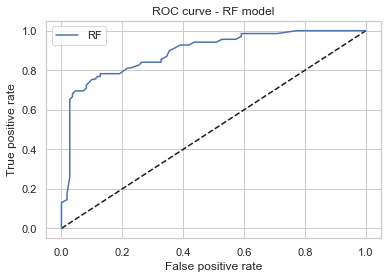

In [562]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [563]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8915019762845849

#### Part 3.4.1: ROC of LR Model

In [564]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thres = roc_curve(y_test, y_pred_lr)

In [565]:
best_LR_model.predict_proba(X_test)

array([[0.35772217, 0.64227783],
       [0.88482129, 0.11517871],
       [0.84139998, 0.15860002],
       [0.99104265, 0.00895735],
       [0.92264512, 0.07735488],
       [0.22074062, 0.77925938],
       [0.75009292, 0.24990708],
       [0.05825618, 0.94174382],
       [0.21213143, 0.78786857],
       [0.86953099, 0.13046901],
       [0.92530549, 0.07469451],
       [0.93561163, 0.06438837],
       [0.28694991, 0.71305009],
       [0.21340529, 0.78659471],
       [0.90167837, 0.09832163],
       [0.94080745, 0.05919255],
       [0.91982479, 0.08017521],
       [0.89190061, 0.10809939],
       [0.92911008, 0.07088992],
       [0.63889227, 0.36110773],
       [0.77585072, 0.22414928],
       [0.67023641, 0.32976359],
       [0.33648863, 0.66351137],
       [0.9507617 , 0.0492383 ],
       [0.10912284, 0.89087716],
       [0.80351691, 0.19648309],
       [0.91979592, 0.08020408],
       [0.72196815, 0.27803185],
       [0.67488928, 0.32511072],
       [0.94469695, 0.05530305],
       [0.

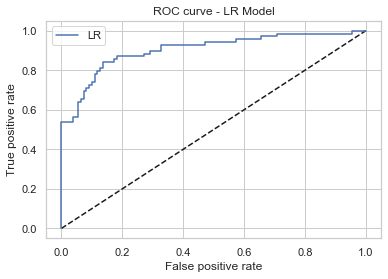

In [566]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [567]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.9031620553359685

# Part 4: Feature Importance

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

The corelated features that we are interested in

In [568]:
X_with_corr = X_train.copy()
X_with_corr.head()

,Sex,Age,SibSp,Parch,Fare,Ccode,Cnumber,Tcode,Tnumber,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
838,1,32.0,0,0,56.4958,7,101,13,94,0,1,0,1
523,0,44.0,0,1,57.9792,1,27,13,8,0,0,0,0
752,1,33.0,0,0,9.5000,7,101,13,430,0,1,0,1
477,1,29.0,1,0,7.0458,7,101,13,433,0,1,0,1
857,1,51.0,0,0,26.5500,4,26,13,25,0,0,0,1


In [569]:
# add L1 regularization to logistic regression
# check the coef for feature selection
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.01, solver='liblinear')
LRmodel_l1.fit(X_l1, y_train)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
    print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Sex : -0.4284
Pclass_3 : -0.0033
Embarked_S : 0.0
Embarked_Q : 0.0
Pclass_2 : 0.0
Tnumber : 0.0
Tcode : 0.0
Cnumber : 0.0
Ccode : 0.0
Fare : 0.0
Parch : 0.0
SibSp : 0.0
Age : 0.0


In [570]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y_train)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
    print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))
  

Logistic Regression (L2) Coefficients
Sex : -1.0831
Age : -0.4253
Pclass_3 : -0.3926
SibSp : -0.2943
Cnumber : -0.2436
Tnumber : -0.2431
Fare : 0.2079
Ccode : -0.159
Embarked_S : -0.1269
Parch : -0.0972
Embarked_Q : 0.0519
Tcode : -0.0425
Pclass_2 : -0.0117


### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [571]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X_train.shape[1]):
    print ("{0} : {1}".format(X_train.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Sex : 0.2125
Tnumber : 0.1977
Fare : 0.1568
Age : 0.1565
Ccode : 0.053
Cnumber : 0.0425
SibSp : 0.0406
Tcode : 0.0394
Pclass_3 : 0.035
Parch : 0.0296
Pclass_2 : 0.0146
Embarked_S : 0.0135
Embarked_Q : 0.0083


C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [572]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [573]:
finalDf = pd.concat([principalDf, y_train], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Survived
0,-223.402309,0.051227,0.0
1,-312.549678,8.038311,1.0
2,115.081978,-13.297702,1.0
3,118.332974,-15.476599,1.0
4,-292.939522,-20.715357,0.0


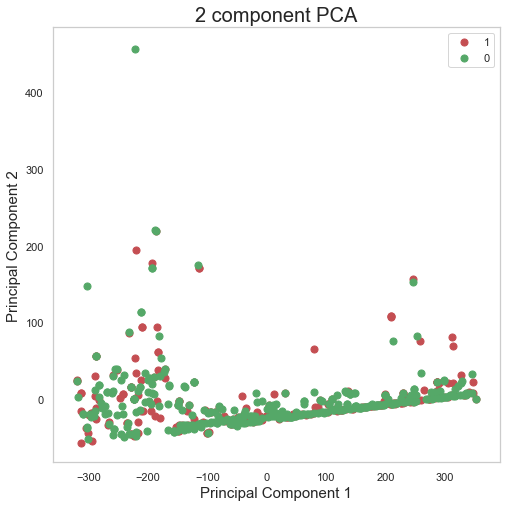

In [574]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Survived'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [575]:
pca.explained_variance_ratio_

array([0.93208607, 0.04963322])

# Part 5: Final Prediction

In [581]:
df2 = pd.read_csv('test.csv')

In [582]:
df2['Ccode'] = df2['Cabin'].str[0]

for i in range(len(df2)):
    if len(str(df2['Cabin'][i])) >=5:
        df2['Cnumber'] = 'multiple'
    else:
        df2['Cnumber'] = df2['Cabin'].str[1:]

In [583]:
Tcode = []
Tnumber = []
temp = []

for i in range(len(df2)):
    temp.append(df2['Ticket'][i].split())
    
for i in range(len(temp)):
    if len(temp[i]) == 1:
        temp[i] = [np.nan] + temp[i]
        
for i in range(len(temp)):
    Tcode.append(temp[i][0])
    Tnumber.append(temp[i][1])
    
# remove period in Ticket code
for i in range(len(Tcode)):
    if str(Tcode[i])[-1] == '.':
        Tcode[i] = Tcode[i][0:len(Tcode[i])-1]
    
df2['Tcode'] = Tcode
df2['Tnumber'] = Tnumber

In [584]:
df2['Sex'] = (df2['Sex'] == 'male')
df2['Sex'] = df2['Sex'].astype(int)

df2["Age"].fillna(df["Age"].median(), inplace = True) 

df2["Ccode"].fillna("No Record", inplace = True)
df2["Cnumber"].fillna("No Record", inplace = True)
df2['Ccode'] = labelencoder.fit_transform(df2['Ccode'])
df2['Cnumber'] = labelencoder.fit_transform(df2['Cnumber'])

df2["Tcode"].fillna("No Record", inplace = True)
df2["Tnumber"].fillna("No Record", inplace = True)
df2['Tcode'] = labelencoder.fit_transform(df2['Tcode'])
df2['Tnumber'] = labelencoder.fit_transform(df2['Tnumber'])

df2["Embarked"].fillna(df2["Embarked"].mode(), inplace = True) 
df2["Fare"].fillna(df2["Fare"].mean(), inplace = True) 

df2 = pd.get_dummies(df2, columns=['Pclass', 'Embarked'], drop_first=True)
df2 = df2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [585]:
df2.isnull().sum()

Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Ccode         0
Cnumber       0
Tcode         0
Tnumber       0
Pclass_2      0
Pclass_3      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [586]:
best_RF_model.predict(df2)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [587]:
df_final = pd.read_csv('gender_submission.csv')

In [588]:
df_final['Survived'] = best_RF_model.predict(df2)

In [589]:
df_final.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [590]:
df_final.to_csv('gender_submission.csv', index = False)